In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
train_data = pd.read_csv('customer_train.csv')
test_data = pd.read_csv('customer_test.csv')


In [99]:
train_data.head(10)

,Unnamed: 0,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
5,5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,...,6,0,0,0,0,0,0,3,11,0
6,6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,...,6,0,0,0,0,0,0,3,11,0
7,7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,...,8,0,0,0,0,0,0,3,11,0
8,8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,...,9,0,0,0,0,0,0,3,11,1
9,9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,...,20,1,0,0,0,0,0,3,11,0


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1680 non-null   int64  
 1   Unnamed: 0.1         1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [101]:
test_data.head(10) 

,Unnamed: 0,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0
5,1686,1686,1891,1980,S2,Cerai,78789000.0,0,0,08-08-2012,...,2,0,0,0,0,0,0,3,11,1
6,1687,1687,2570,1968,S1,Bertunangan,56534000.0,0,1,23-07-2013,...,8,0,1,0,0,1,0,3,11,1
7,1688,1688,9256,1971,S1,Lajang,58350000.0,0,1,04-01-2013,...,6,0,0,0,0,0,0,3,11,0
8,1689,1689,295,1989,S1,Lajang,81217000.0,0,0,19-07-2013,...,1,0,0,0,0,0,0,3,11,0
9,1690,1690,7397,1951,S1,Lajang,49090000.0,0,1,19-07-2013,...,7,0,0,0,0,0,0,3,11,0


In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           559 non-null    int64  
 1   Unnamed: 0.1         559 non-null    int64  
 2   ID                   559 non-null    int64  
 3   Year_Birth           559 non-null    int64  
 4   Education            559 non-null    object 
 5   Marital_Status       559 non-null    object 
 6   Income               552 non-null    float64
 7   Kidhome              559 non-null    int64  
 8   Teenhome             559 non-null    int64  
 9   Dt_Customer          559 non-null    object 
 10  Recency              559 non-null    int64  
 11  MntCoke              559 non-null    int64  
 12  MntFruits            559 non-null    int64  
 13  MntMeatProducts      559 non-null    int64  
 14  MntFishProducts      559 non-null    int64  
 15  MntSweetProducts     559 non-null    int

In [103]:
train_null_values = train_data.isnull().sum()
test_null_values = test_data.isnull().sum()


In [104]:
train_null_values

Unnamed: 0              0
Unnamed: 0.1            0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [105]:
test_null_values

Unnamed: 0             0
Unnamed: 0.1           0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [106]:
train_data.shape

(1680, 31)

In [107]:
test_data.shape

(559, 31)

In [108]:
test_data.head(10) 

,Unnamed: 0,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0
5,1686,1686,1891,1980,S2,Cerai,78789000.0,0,0,08-08-2012,...,2,0,0,0,0,0,0,3,11,1
6,1687,1687,2570,1968,S1,Bertunangan,56534000.0,0,1,23-07-2013,...,8,0,1,0,0,1,0,3,11,1
7,1688,1688,9256,1971,S1,Lajang,58350000.0,0,1,04-01-2013,...,6,0,0,0,0,0,0,3,11,0
8,1689,1689,295,1989,S1,Lajang,81217000.0,0,0,19-07-2013,...,1,0,0,0,0,0,0,3,11,0
9,1690,1690,7397,1951,S1,Lajang,49090000.0,0,1,19-07-2013,...,7,0,0,0,0,0,0,3,11,0


# Data cleaning

In [109]:
train_data = train_data.drop(train_data.columns[:2], axis=1)
test_data = test_data.drop(test_data.columns[:2], axis=1)


 Removed the first two columns from both DataFrames

In [110]:
# Calculate the mean of the "income" column in train_data
mean_income = train_data["Income"].mean()

# Fill null values in the "income" column with the mean
train_data["Income"].fillna(mean_income, inplace=True)
test_data["Income"].fillna(mean_income, inplace=True)


 calculate the mean of the "Income" column in the train_data DataFrame using the .mean() method.

 Then use the .fillna() method to fill the null values in the "Income" column of both train_data and test_data with the calculated mean value.

In [111]:
# Replacing marital status with english synonyms
train_data["Marital_Status"] = train_data['Marital_Status'].replace('Menikah','Married')
train_data["Marital_Status"] = train_data['Marital_Status'].replace('Bertunangan','Bachelor')
train_data["Marital_Status"] = train_data['Marital_Status'].replace('Lajang','Bachelor')
train_data["Marital_Status"] = train_data['Marital_Status'].replace('Cerai','Bachelor')

test_data["Marital_Status"] = test_data['Marital_Status'].replace('Menikah','Married')
test_data["Marital_Status"] = test_data['Marital_Status'].replace('Bertunangan','Married')
test_data["Marital_Status"] = test_data['Marital_Status'].replace('Lajang','Bachelor')
test_data["Marital_Status"] = test_data['Marital_Status'].replace('Cerai','Bachelor')


In [112]:
# Calculate age and create a new "Age" column
train_data['Age'] = 2023 - train_data['Year_Birth']
test_data['Age'] = 2023 - test_data['Year_Birth']

# Create a new "children" column by adding "Kidhome" and "Teenhome" columns
train_data['Children'] = train_data['Kidhome'] + train_data['Teenhome']
test_data['Children'] = test_data['Kidhome'] + test_data['Teenhome']

# List of columns to sum
columns_to_sum = ["MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
# Create a new "spent" column by summing the specified columns along axis 1
train_data['Spent'] = train_data[columns_to_sum].sum(axis=1)
test_data['Spent'] = test_data[columns_to_sum].sum(axis=1)

# Create a new "parent" column based on the "children" column
train_data['parent'] = train_data['Children'].apply(lambda x: 0 if x == 0 else 1)
test_data['parent'] = test_data['Children'].apply(lambda x: 0 if x == 0 else 1)

# Define a mapping of old values to new values
education_mapping = {
    'SMA': 'SCHOOL LEVEL',
    'S1': 'UG',
    'S2': 'PG',
    'S3': 'PHD'
}

# Use the .replace() method to replace values in the "Education" column
train_data['Education'].replace(education_mapping, inplace=True)
test_data['Education'].replace(education_mapping, inplace=True)


In [113]:
train_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent
0,5524,1957,UG,Bachelor,58138000.0,0,0,04-09-2012,58,635000,...,0,0,0,3,11,1,66,0,1617000,0
1,2174,1954,UG,Bachelor,46344000.0,1,1,08-03-2014,38,11000,...,0,0,0,3,11,0,69,2,27000,1
2,4141,1965,UG,Bachelor,71613000.0,0,0,21-08-2013,26,426000,...,0,0,0,3,11,0,58,0,776000,0
3,6182,1984,UG,Bachelor,26646000.0,1,0,10-02-2014,26,11000,...,0,0,0,3,11,0,39,1,53000,1
4,5324,1981,PHD,Married,58293000.0,1,0,19-01-2014,94,173000,...,0,0,0,3,11,0,42,1,422000,1


In [114]:
test_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent
count,559.000000,559.000000,5.590000e+02,559.000000,559.000000,559.000000,5.590000e+02,559.000000,5.590000e+02,559.000000,...,559.000000,559.000000,559.000000,559.0,559.0,559.000000,559.000000,559.000000,5.590000e+02,559.000000
mean,5721.500894,1968.663685,5.290468e+07,0.420394,0.525939,49.187835,3.003488e+05,27293.381038,1.698909e+05,39171.735242,...,0.067979,0.017889,0.007156,3.0,11.0,0.164580,54.336315,0.946333,6.097657e+05,0.728086
std,3269.336755,11.867607,3.375909e+07,0.511880,0.527682,29.109522,3.303610e+05,40361.180414,2.300301e+05,56039.372894,...,0.251935,0.132667,0.084363,0.0,0.0,0.371133,11.867607,0.716410,6.035638e+05,0.445344
min,17.000000,1940.000000,4.023000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,0.000000,8.000000e+03,0.000000
25%,2850.500000,1958.500000,3.438550e+07,0.000000,0.000000,25.000000,2.300000e+04,2000.000000,1.500000e+04,3000.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,0.000000,6.800000e+04,0.000000
50%,5631.000000,1970.000000,5.201434e+07,0.000000,1.000000,49.000000,1.750000e+05,8000.000000,6.400000e+04,12000.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,1.000000,4.130000e+05,1.000000
75%,8603.500000,1977.000000,6.925400e+07,1.000000,1.000000,74.000000,5.140000e+05,35000.000000,2.245000e+05,55000.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.500000,1.000000,1.059500e+06,1.000000
max,11187.000000,1995.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,1.607000e+06,258000.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,83.000000,3.000000,2.257000e+06,1.000000


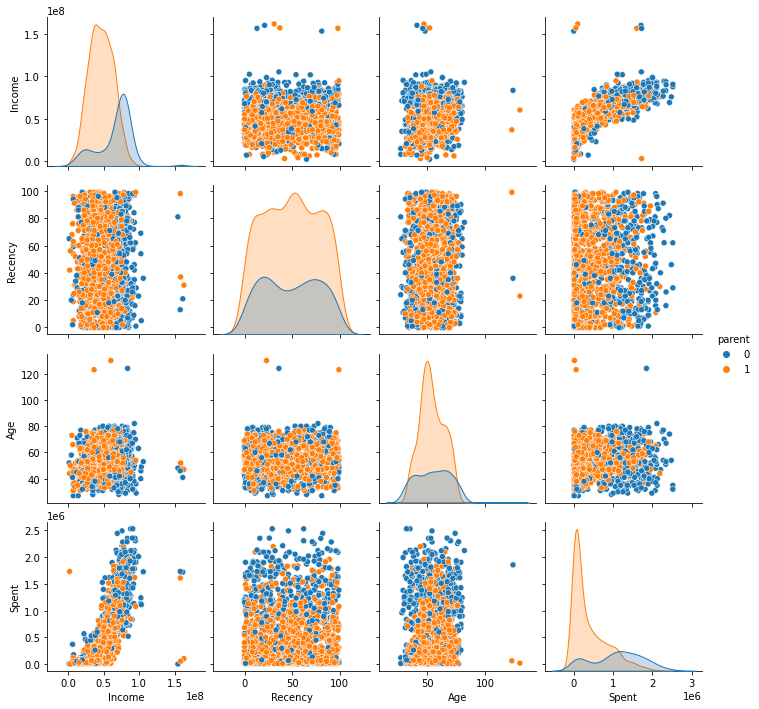

In [115]:



# Select the columns you want for the pair plot
selected_columns = ["Income", "Recency", "Age", "Spent","parent"]

# Create a DataFrame with only the selected columns
selected_data = train_data[selected_columns]

# Create a pair plot
sns.pairplot(selected_data, hue='parent')

# Display the pair plot
plt.show()


In [116]:
train_data.Income.describe()

count    1.680000e+03
mean     5.201434e+07
std      2.137345e+07
min      1.730000e+06
25%      3.579075e+07
50%      5.144550e+07
75%      6.789750e+07
max      1.623970e+08
Name: Income, dtype: float64

In [117]:
train_data.Age.describe()

count    1680.000000
mean       54.152381
std        12.027192
min        27.000000
25%        46.000000
50%        53.000000
75%        63.000000
max       130.000000
Name: Age, dtype: float64

In [118]:
# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the "Age" column
train_data = remove_outliers_iqr(train_data, "Age")
train_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent
0,5524,1957,UG,Bachelor,58138000.0,0,0,04-09-2012,58,635000,...,0,0,0,3,11,1,66,0,1617000,0
1,2174,1954,UG,Bachelor,46344000.0,1,1,08-03-2014,38,11000,...,0,0,0,3,11,0,69,2,27000,1
2,4141,1965,UG,Bachelor,71613000.0,0,0,21-08-2013,26,426000,...,0,0,0,3,11,0,58,0,776000,0
3,6182,1984,UG,Bachelor,26646000.0,1,0,10-02-2014,26,11000,...,0,0,0,3,11,0,39,1,53000,1
4,5324,1981,PHD,Married,58293000.0,1,0,19-01-2014,94,173000,...,0,0,0,3,11,0,42,1,422000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bachelor,20193000.0,0,0,28-11-2012,18,8000,...,0,0,0,3,11,0,32,0,82000,0
1676,1170,1975,UG,Married,27573000.0,1,0,25-03-2013,45,50000,...,0,0,0,3,11,0,48,1,244000,1
1677,6347,1979,SCHOOL LEVEL,Bachelor,15862000.0,1,0,27-06-2013,26,1000,...,0,0,0,3,11,0,44,1,36000,1
1678,4065,1976,PHD,Married,49544000.0,1,0,12-02-2013,0,308000,...,0,0,0,3,11,0,47,1,404000,1


In [119]:
# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the "Age" column
train_data = remove_outliers_iqr(train_data, "Income")
train_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent
0,5524,1957,UG,Bachelor,58138000.0,0,0,04-09-2012,58,635000,...,0,0,0,3,11,1,66,0,1617000,0
1,2174,1954,UG,Bachelor,46344000.0,1,1,08-03-2014,38,11000,...,0,0,0,3,11,0,69,2,27000,1
2,4141,1965,UG,Bachelor,71613000.0,0,0,21-08-2013,26,426000,...,0,0,0,3,11,0,58,0,776000,0
3,6182,1984,UG,Bachelor,26646000.0,1,0,10-02-2014,26,11000,...,0,0,0,3,11,0,39,1,53000,1
4,5324,1981,PHD,Married,58293000.0,1,0,19-01-2014,94,173000,...,0,0,0,3,11,0,42,1,422000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bachelor,20193000.0,0,0,28-11-2012,18,8000,...,0,0,0,3,11,0,32,0,82000,0
1676,1170,1975,UG,Married,27573000.0,1,0,25-03-2013,45,50000,...,0,0,0,3,11,0,48,1,244000,1
1677,6347,1979,SCHOOL LEVEL,Bachelor,15862000.0,1,0,27-06-2013,26,1000,...,0,0,0,3,11,0,44,1,36000,1
1678,4065,1976,PHD,Married,49544000.0,1,0,12-02-2013,0,308000,...,0,0,0,3,11,0,47,1,404000,1


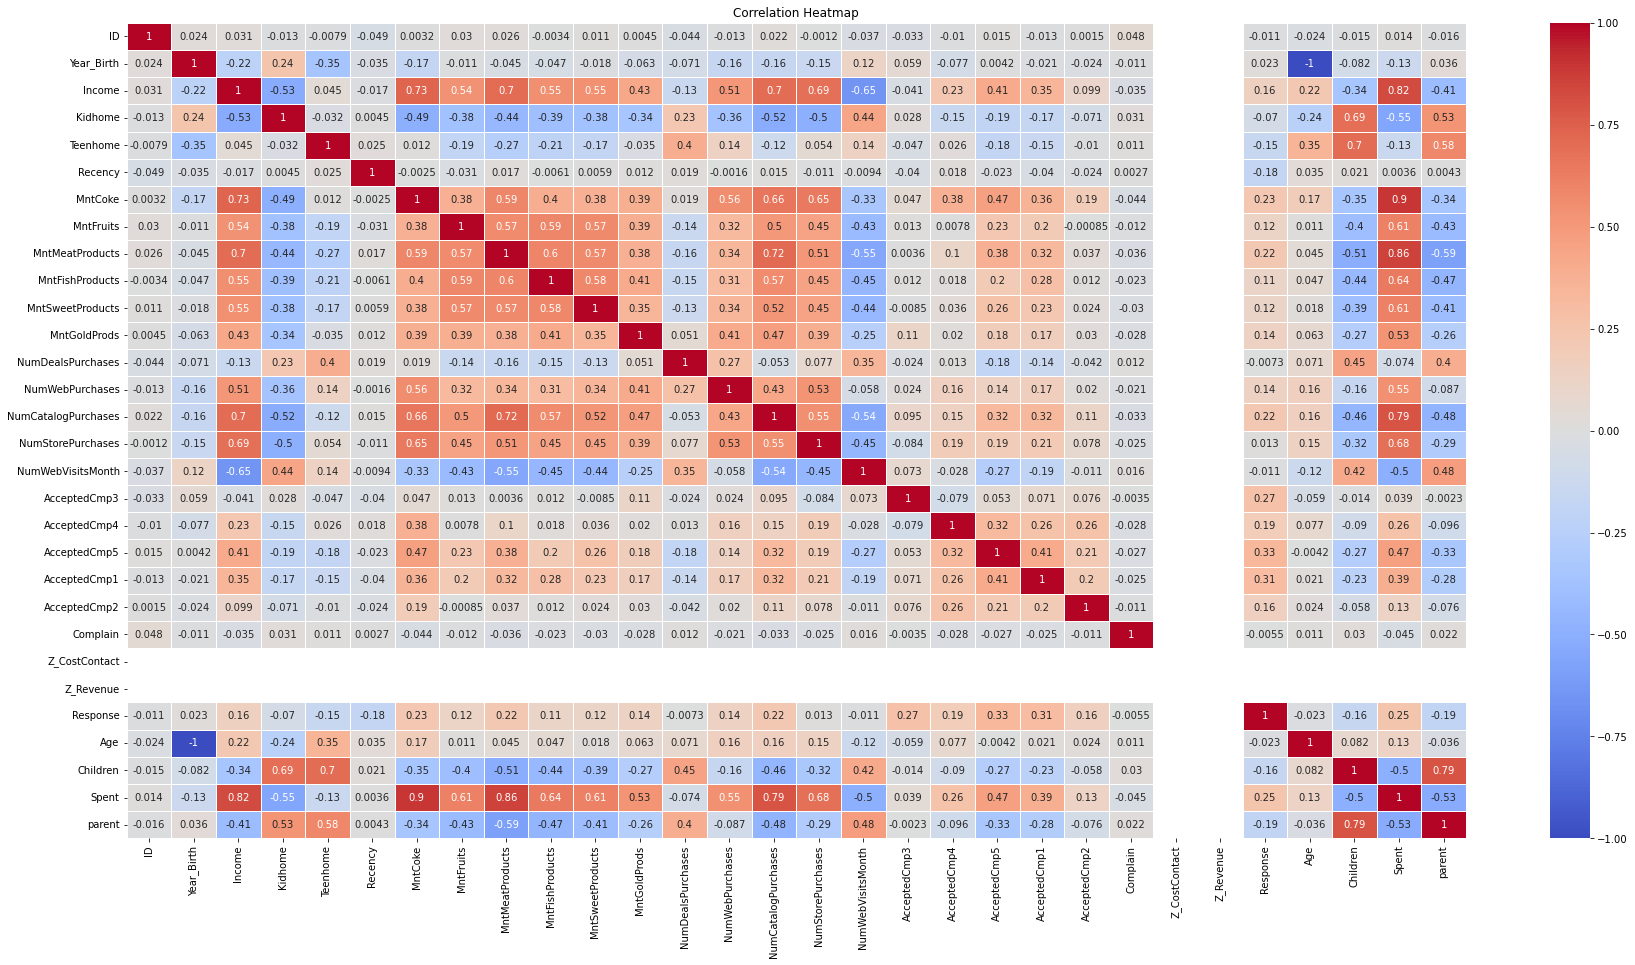

In [120]:

# Create a correlation matrix for all columns
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 15))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

# Data preprocessing

Label encoding

In [121]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in train_data.columns:
    if train_data[column].dtype == 'object':  # Check if the column contains categorical data
        train_data[column] = label_encoder.fit_transform(train_data[column])

C:\Users\DELL\AppData\Local\Temp/ipykernel_18116/2208043418.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[column] = label_encoder.fit_transform(train_data[column])


In [122]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in test_data.columns:
    if test_data[column].dtype == 'object':  # Check if the column contains categorical data
        test_data[column] = label_encoder.fit_transform(test_data[column])

In [123]:
train_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent
0,5524,1957,4,0,58138000.0,0,0,74,58,635000,...,0,0,0,3,11,1,66,0,1617000,0
1,2174,1954,4,0,46344000.0,1,1,144,38,11000,...,0,0,0,3,11,0,69,2,27000,1
2,4141,1965,4,0,71613000.0,0,0,412,26,426000,...,0,0,0,3,11,0,58,0,776000,0
3,6182,1984,4,0,26646000.0,1,0,183,26,11000,...,0,0,0,3,11,0,39,1,53000,1
4,5324,1981,2,3,58293000.0,1,0,362,94,173000,...,0,0,0,3,11,0,42,1,422000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,0,0,20193000.0,0,0,564,18,8000,...,0,0,0,3,11,0,32,0,82000,0
1676,1170,1975,4,3,27573000.0,1,0,490,45,50000,...,0,0,0,3,11,0,48,1,244000,1
1677,6347,1979,3,0,15862000.0,1,0,534,26,1000,...,0,0,0,3,11,0,44,1,36000,1
1678,4065,1976,2,3,49544000.0,1,0,223,0,308000,...,0,0,0,3,11,0,47,1,404000,1


Standard scaler

In [124]:

# Select the numeric columns you want to standardize
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numeric columns
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [125]:
 train_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent
0,-0.009062,-1.025112,4,0,0.319048,-0.828124,-0.910479,74,0.308441,0.971240,...,-0.25894,-0.110063,-0.098324,0.0,0.0,2.430012,1.025112,-1.249807,1.690637,-1.572899
1,-1.043961,-1.282430,4,0,-0.258120,0.999876,0.907215,144,-0.383517,-0.870621,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,1.282430,1.370553,-0.960013,0.635769
2,-0.436305,-0.338932,4,0,0.978479,-0.828124,-0.910479,412,-0.798691,0.354335,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,0.338932,-1.249807,0.288626,-1.572899
3,0.194211,1.290745,4,0,-1.222088,0.999876,-0.910479,183,-0.798691,-0.870621,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,-1.290745,0.060373,-0.916669,0.635769
4,-0.070847,1.033428,2,3,0.326633,0.999876,-0.910479,362,1.553965,-0.392445,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,-1.033428,0.060373,-0.301518,0.635769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,-0.259909,1.891153,0,0,-1.537881,-0.828124,-0.910479,564,-1.075475,-0.879476,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,-1.891153,-1.249807,-0.868324,-1.572899
1676,-1.354122,0.518793,4,3,-1.176723,0.999876,-0.910479,490,-0.141332,-0.755504,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,-0.518793,0.060373,-0.598258,0.635769
1677,0.245184,0.861883,3,0,-1.749829,0.999876,-0.910479,534,-0.798691,-0.900138,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,-0.861883,0.060373,-0.945009,0.635769
1678,-0.459784,0.604565,2,3,-0.101520,0.999876,-0.910479,223,-1.698237,0.006034,...,-0.25894,-0.110063,-0.098324,0.0,0.0,-0.411521,-0.604565,0.060373,-0.331525,0.635769


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


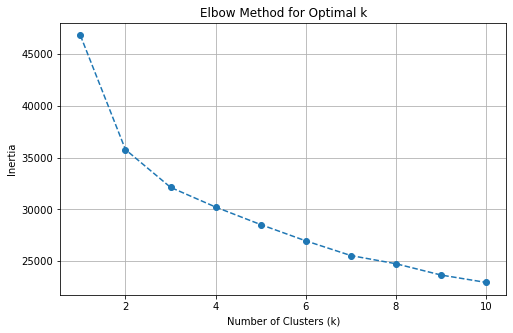

In [126]:


# Assuming you have already loaded and standardized your data into a DataFrame
# train_data = ... (as per the previous steps)

# Select the numeric columns for clustering
numeric_columns = train_data.select_dtypes(include=['int64', 'float64'])

# Create a list to store the within-cluster sum of squares (inertia) for different values of k
inertia_values = []

# Determine the optimal number of clusters using the elbow method
for k in range(1, 11):  # Try values of k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(numeric_columns)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [127]:

from sklearn.cluster import AgglomerativeClustering

# Assuming you have already loaded and standardized your data into a DataFrame
# train_data = ... (as per the previous steps)

# Select the numeric columns for clustering
numeric_columns = train_data.select_dtypes(include=['int64', 'float64'])

# Initialize the Agglomerative Clustering model with 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=4)

# Fit the model to the data and obtain cluster labels
cluster_labels = agg_cluster.fit_predict(numeric_columns)

# Add the cluster labels to the DataFrame
train_data['Cluster_Labels'] = cluster_labels




C:\Users\DELL\AppData\Local\Temp/ipykernel_18116/2649355701.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cluster_Labels'] = cluster_labels


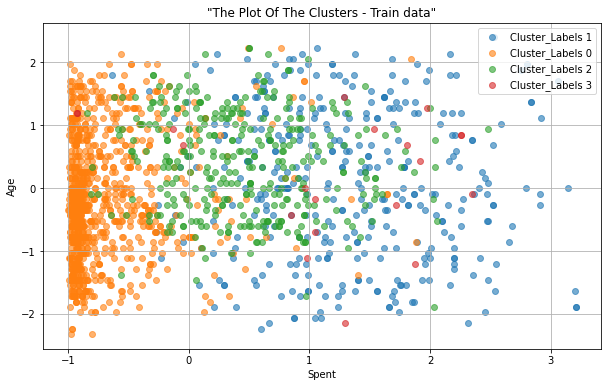

In [128]:

# Select the columns you want to plot
columns_to_plot = ["Spent", "Age"]

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster_id in train_data['Cluster_Labels'].unique():
    cluster_data = train_data[train_data['Cluster_Labels'] == cluster_id]
    plt.scatter(cluster_data[columns_to_plot[0]], cluster_data[columns_to_plot[1]], label=f'Cluster_Labels {cluster_id}', alpha=0.6)

# Add labels and legend
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.title('"The Plot Of The Clusters - Train data"')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Cluster 0 encompasses individuals aged 20 to 80, exhibiting moderate spending patterns despite having high incomes. This group mainly consists of parents with teenagers in their households, with a majority holding graduate-level degrees. Cluster 1 comprises people aged 20 to 90, characterized by low spending habits and modest incomes. Predominantly, they are parents. Cluster 2 is composed of individuals aged 40 to 80, showcasing elevated spending levels and average to high incomes, spanning various marital statuses and educational backgrounds. Cluster 3 encompasses individuals aged 40 to 80, characterized by minimal spending tendencies despite their predominantly high incomes, with a significant presence of households with teenagers.

In [129]:

# Select the numeric columns for clustering
numeric_columns = test_data.select_dtypes(include=['int64', 'float64'])

# Initialize the Agglomerative Clustering model with 4 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Fit the model to your test data
cluster_labels = agg_clustering.fit_predict(numeric_columns)

# Add the cluster labels to your test data DataFrame
test_data['Cluster'] = cluster_labels


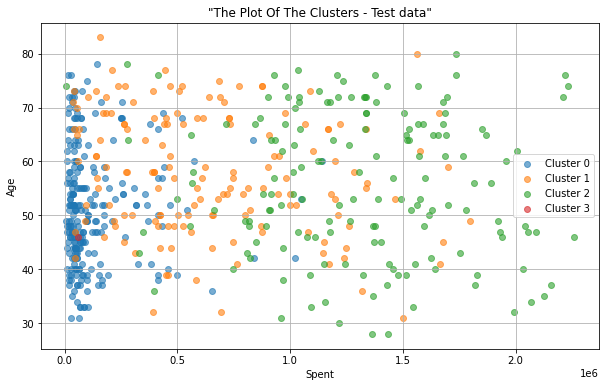

In [130]:
# Select the columns you want to plot
columns_to_plot = ["Spent", "Age"]

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster_id in test_data['Cluster'].unique():
    Cluster = test_data[test_data['Cluster'] == cluster_id]
    plt.scatter(Cluster[columns_to_plot[0]], Cluster[columns_to_plot[1]], label=f'Cluster {cluster_id}', alpha=0.6)

# Add labels and legend
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.title('"The Plot Of The Clusters - Test data"')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


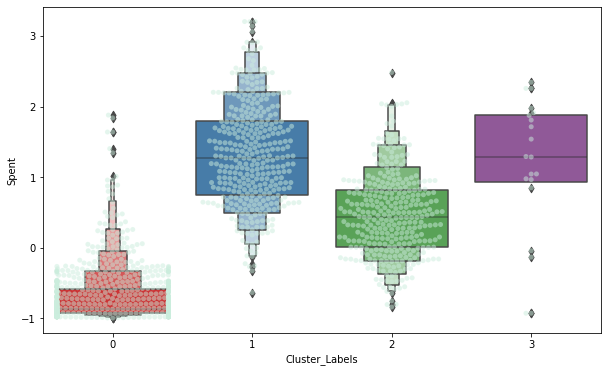

In [131]:
custom_palette = sns.color_palette("Set1")
plt.figure(figsize=(10, 6))
pl = sns.swarmplot(x=train_data ["Cluster_Labels"], y=train_data ["Spent"], color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=train_data ["Cluster_Labels"], y=train_data ["Spent"], palette=custom_palette)
plt.show()

In [132]:
train_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent,Cluster_Labels
0,-0.009062,-1.025112,4,0,0.319048,-0.828124,-0.910479,74,0.308441,0.971240,...,-0.110063,-0.098324,0.0,0.0,2.430012,1.025112,-1.249807,1.690637,-1.572899,1
1,-1.043961,-1.282430,4,0,-0.258120,0.999876,0.907215,144,-0.383517,-0.870621,...,-0.110063,-0.098324,0.0,0.0,-0.411521,1.282430,1.370553,-0.960013,0.635769,0
2,-0.436305,-0.338932,4,0,0.978479,-0.828124,-0.910479,412,-0.798691,0.354335,...,-0.110063,-0.098324,0.0,0.0,-0.411521,0.338932,-1.249807,0.288626,-1.572899,1
3,0.194211,1.290745,4,0,-1.222088,0.999876,-0.910479,183,-0.798691,-0.870621,...,-0.110063,-0.098324,0.0,0.0,-0.411521,-1.290745,0.060373,-0.916669,0.635769,0
4,-0.070847,1.033428,2,3,0.326633,0.999876,-0.910479,362,1.553965,-0.392445,...,-0.110063,-0.098324,0.0,0.0,-0.411521,-1.033428,0.060373,-0.301518,0.635769,0


C:\Users\DELL\AppData\Local\Temp/ipykernel_18116/3734311015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data ["Total_Promos"] = train_data ["AcceptedCmp1"] + train_data ["AcceptedCmp2"] + train_data ["AcceptedCmp3"] + train_data ["AcceptedCmp4"] + train_data ["AcceptedCmp5"]


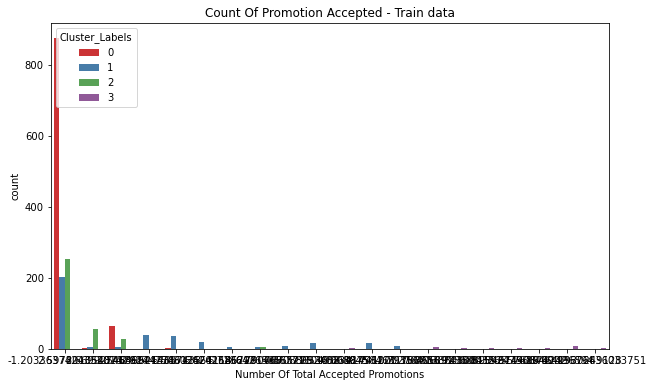

In [133]:
custom_palette = sns.color_palette("Set1")  

train_data ["Total_Promos"] = train_data ["AcceptedCmp1"] + train_data ["AcceptedCmp2"] + train_data ["AcceptedCmp3"] + train_data ["AcceptedCmp4"] + train_data ["AcceptedCmp5"]

#Plotting count of total campaign accepted.
plt.figure(figsize=(10, 6))
pl = sns.countplot(x=train_data ["Total_Promos"], hue=train_data ["Cluster_Labels"], palette=custom_palette)
pl.set_title("Count Of Promotion Accepted - Train data")
pl.set_xlabel("Number Of Total Accepted Promotions")

plt.show()

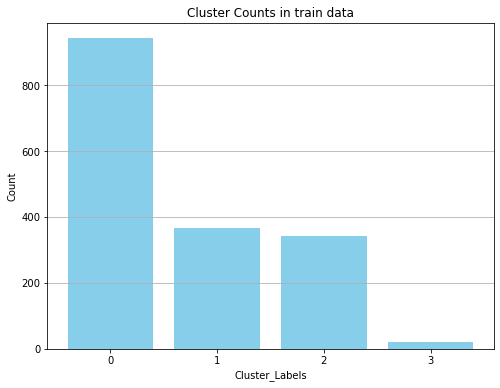

In [134]:

# Count the number of data points in each cluster
cluster_counts = train_data['Cluster_Labels'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster_Labels')
plt.ylabel('Count')
plt.title('Cluster Counts in train data')
plt.xticks(cluster_counts.index)
plt.grid(axis='y')
plt.show()

Upon conducting the clustering algorithm on the provided dataset, it became evident that there are four separate clusters. Most of the customers are found within either group-0 , with group-3  containing the smallest number of customers.

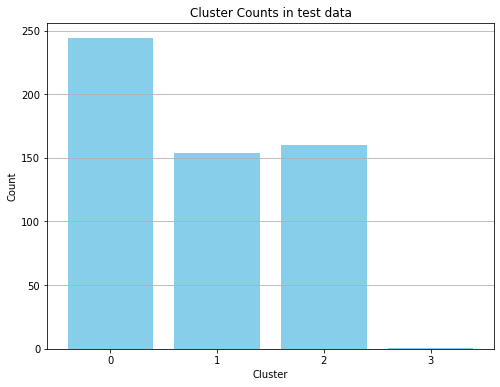

In [135]:

# Count the number of data points in each cluster
cluster_counts = test_data['Cluster'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts in test data')
plt.xticks(cluster_counts.index)
plt.grid(axis='y')
plt.show()

Upon conducting the clustering algorithm on the provided dataset, it became evident that there are four separate clusters. Most of the customers are found within either group-0 , with group-3 containing the smallest number of customers.

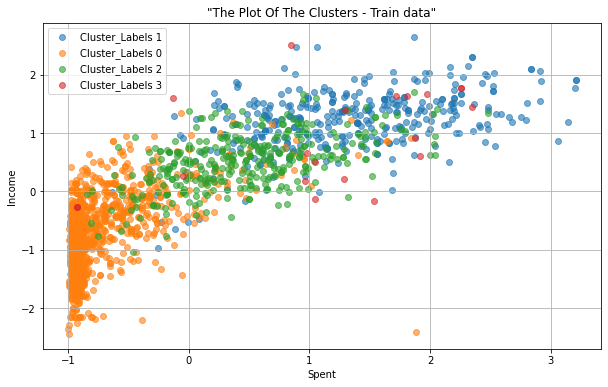

In [136]:
# Select the columns you want to plot
columns_to_plot = ["Spent", "Income"]

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster_id in train_data['Cluster_Labels'].unique():
    cluster_data = train_data[train_data['Cluster_Labels'] == cluster_id]
    plt.scatter(cluster_data[columns_to_plot[0]], cluster_data[columns_to_plot[1]], label=f'Cluster_Labels {cluster_id}', alpha=0.6)

# Add labels and legend
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.title('"The Plot Of The Clusters - Train data"')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Cluster 0 represents individuals with both low spending and low income, while Cluster 1 consists of people with high spending and high income. Cluster 2 is comprised of those who spend a lot but have an average income, and Cluster 3 consists of individuals who also have high spending and high income.

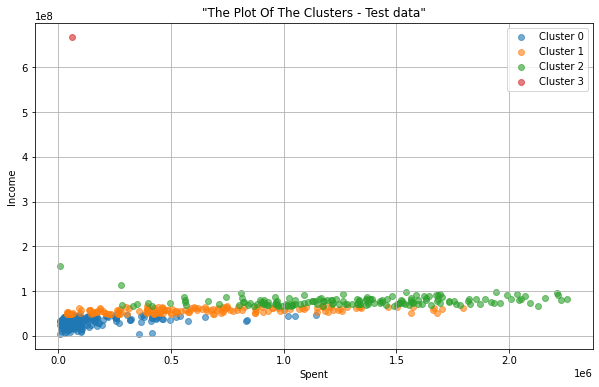

In [137]:
# Select the columns you want to plot
columns_to_plot = ["Spent", "Income"]

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
for cluster_id in test_data['Cluster'].unique():
    Cluster = test_data[test_data['Cluster'] == cluster_id]
    plt.scatter(Cluster[columns_to_plot[0]], Cluster[columns_to_plot[1]], label=f'Cluster {cluster_id}', alpha=0.6)

# Add labels and legend
plt.xlabel(columns_to_plot[0])
plt.ylabel(columns_to_plot[1])
plt.title('"The Plot Of The Clusters - Test data"')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [138]:
test_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Spent,parent,Cluster
0,5939,1971,4,2,38232000.0,1,1,195,84,43000,...,0,0,3,11,0,52,2,122000,1,0
1,2156,1955,2,2,22554000.0,1,1,39,38,27000,...,0,0,3,11,0,68,2,41000,1,0
2,7788,1983,2,2,23536000.0,1,0,44,53,6000,...,0,0,3,11,0,40,1,10000,1,0
3,10323,1952,4,2,49413000.0,0,1,308,88,205000,...,0,0,3,11,0,71,1,304000,1,1
4,7947,1969,4,2,42231000.0,1,1,303,99,24000,...,0,0,3,11,0,54,2,37000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,10870,1967,4,2,61223000.0,0,1,161,46,709000,...,0,0,3,11,0,56,1,1341000,1,1
555,4001,1946,2,2,64014000.0,2,1,126,56,406000,...,0,0,3,11,0,77,3,444000,1,1
556,7270,1981,4,0,56981000.0,0,0,301,91,908000,...,0,0,3,11,0,42,0,1241000,0,1
557,8235,1956,1,2,69245000.0,0,1,288,8,428000,...,0,0,3,11,0,67,1,843000,1,2


# cluster Analysis

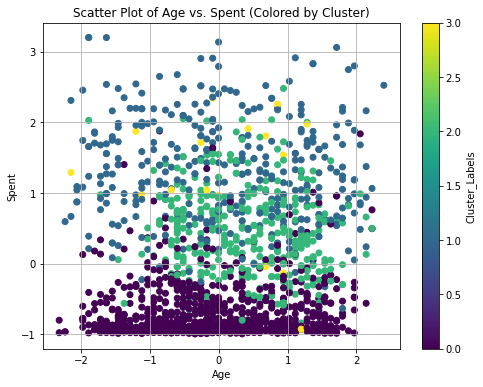

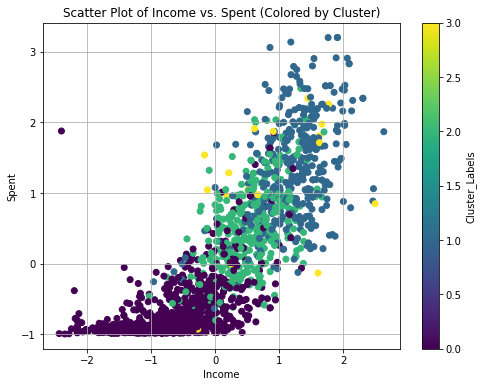

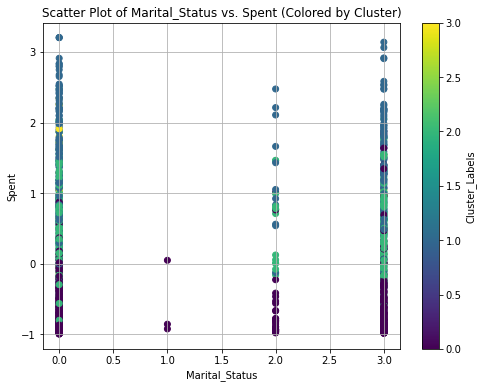

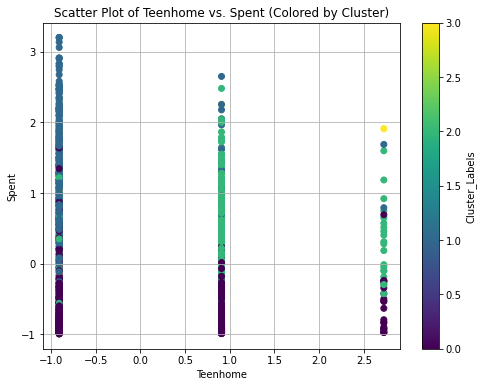

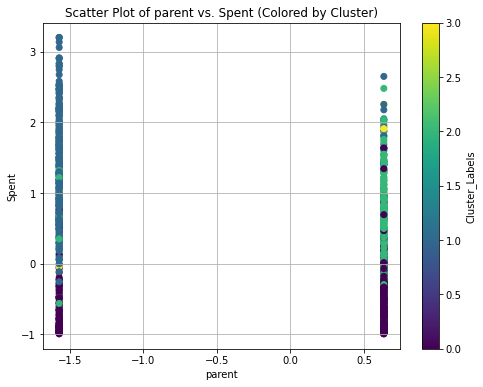

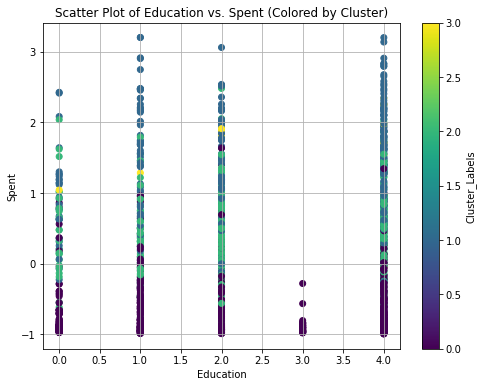

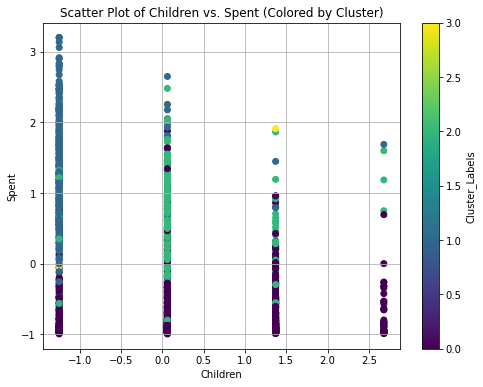

In [139]:
# Select the features for the x-axis
x_features = ["Age", "Income", "Marital_Status", "Teenhome", "parent", "Education", "Children"]

# Create a loop to generate scatter plots
for feature in x_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[feature], train_data['Spent'], c=train_data['Cluster_Labels'], cmap='viridis')
    plt.xlabel(feature)
    plt.ylabel('Spent')
    plt.title(f'Scatter Plot of {feature} vs. Spent (Colored by Cluster)')
    plt.colorbar(label='Cluster_Labels')
    plt.grid(True)
    plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

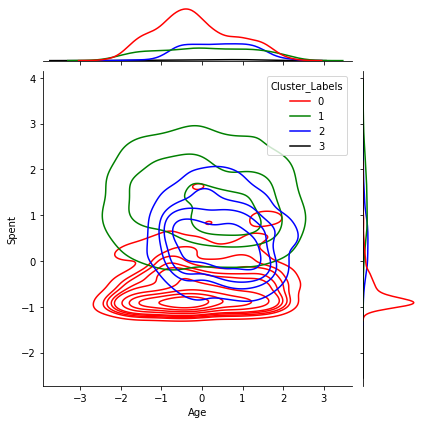

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

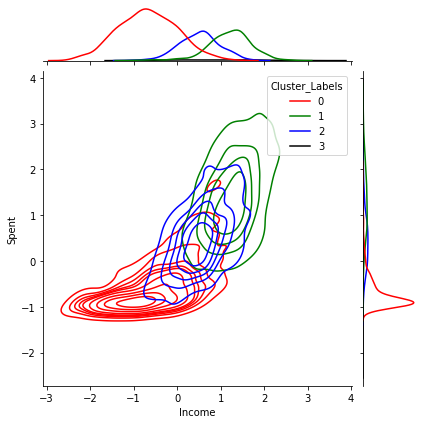

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

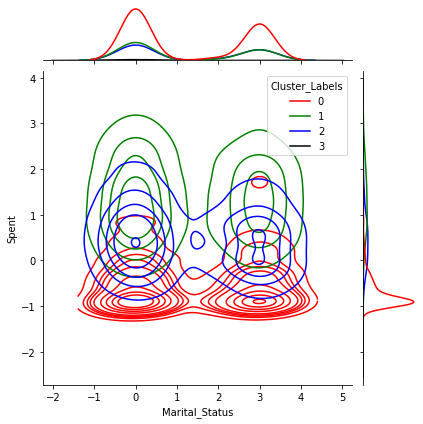

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

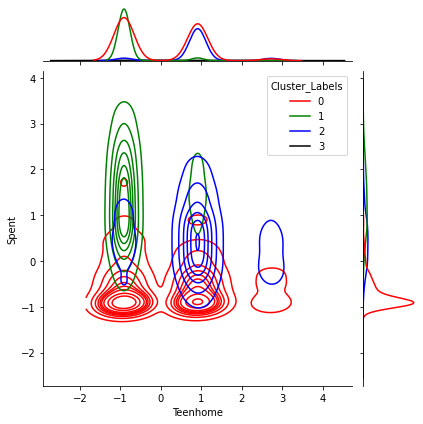

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

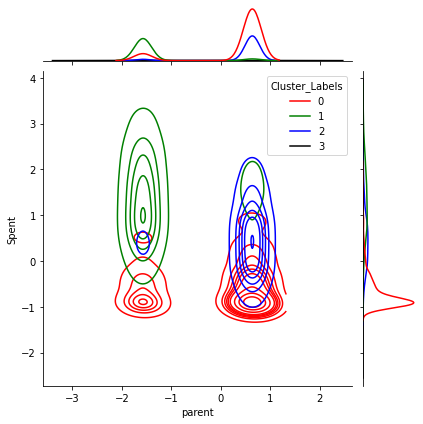

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

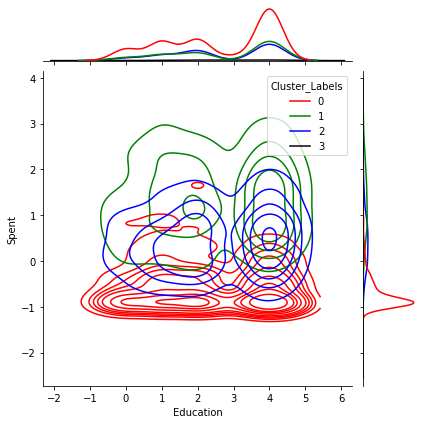

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 432x288 with 0 Axes>

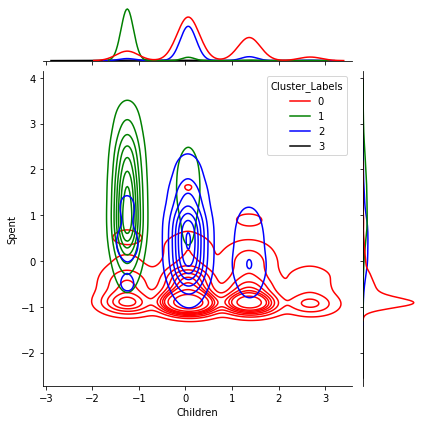

In [140]:


# Select the features for the x-axis
x_features = ["Age", "Income", "Marital_Status", "Teenhome", "parent", "Education", "Children"]

# Set up the figure layout
plt.figure(figsize=(12, 8))

# Define a custom color palette for your clusters
custom_palette = ['red', 'green', 'blue', 'black']

for i in x_features:
    plt.figure()
    sns.jointplot(
        x=train_data[i],
        y=train_data["Spent"],
        hue=train_data["Cluster_Labels"],
        kind="kde",
        palette=custom_palette
    )
    plt.show()

In [143]:
#About Cluster number of 0
#The mejority of these peoples are parents
#At the maximum are 4 members in the family
#They majority have 2 children


#About Cluster number of 1
#Are a definitely not a parent
#High education
#high income
#Atleast one teenager


#About Cluster number of 2
#definitely are a parent
#Atleast one Children
#high education
#At the maximum are 3 teenager
#mejority high income




# Conclusion

In conclusion, the project focused on analyzing customer behavior through a systematic approach. The process began with the division of data into training and testing sets, followed by rigorous data cleaning to ensure the quality of the dataset. Preprocessing steps, including feature selection and transformation, were performed to prepare the data for analysis. Label encoding and standard scaling were applied to facilitate the use of machine learning algorithms. The key outcome of the project involved the application of Agglomerative Clustering, which resulted in the creation of four distinct customer clusters. Finally, cluster analysis provided valuable insights into customer segments, shedding light on their behaviors and preferences, which can be instrumental for making informed business decisions and tailoring marketing strategies.